# Student Performance

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Student_Performance/StudentsPerformance (1).csv")

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
data.shape

(1000, 8)

In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
#checking unique valuse per column
a=data["race/ethnicity"].unique()
print(a)

b=data["gender"].unique()
print(b)

c=data["parental level of education"].unique()
print(c)

d=data["test preparation course"].unique()
print(d)

['group B' 'group C' 'group A' 'group D' 'group E']
['female' 'male']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['none' 'completed']


#Cleaning data

In [ ]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
sample_maths = np.random.choice(a = data['math score'], size = 100)

print('Sample mean for maths score :', sample_maths .mean())

print('Population mean for maths score : ', data['math score'].mean())

Sample mean for maths score : 66.98
Population mean for maths score :  66.089


In [ ]:
sample_reading = np.random.choice(a = data['reading score'], size = 100)

print('Sample mean for reading score :', sample_reading .mean())

print('Population mean for reading score : ', data['reading score'].mean())

Sample mean for reading score : 69.74
Population mean for reading score :  69.169


In [ ]:
sample_writing = np.random.choice(a = data['writing score'], size = 100)

print('Sample mean for writing score :', sample_writing .mean())

print('Population mean for writing score : ', data['writing score'].mean())

Sample mean for writing score : 68.19
Population mean for writing score :  68.054


## Correlation analysis

In [ ]:
Correlation =data.corr()
Correlation

<ipython-input-271-d505ede0ce3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation =data.corr()


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<Axes: >

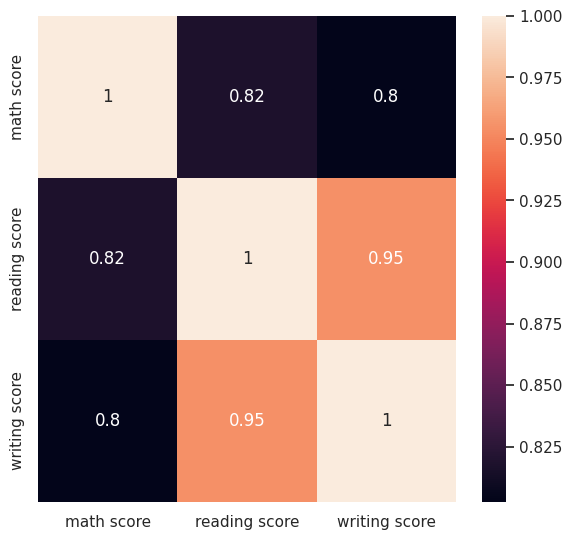

In [ ]:
sb.heatmap(Correlation,xticklabels=Correlation.columns , yticklabels=Correlation.columns , annot=True)

### Grouping the data

In [ ]:
# number of girl students scoring 90 in all the subjects

data[(data["gender"]== 'female') & (data["math score"]>90) & (data["reading score"]>90) & (data["writing score"]>90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
685,female,group E,master's degree,standard,completed,94,99,100
712,female,group D,some college,standard,none,98,100,99


In [ ]:
# number of boys students scoring 90 in all the subjects
data[(data["gender"]== 'male') & (data["math score"]>90) & (data["reading score"]>90) & (data["writing score"]>90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
571,male,group A,bachelor's degree,standard,none,91,96,92
625,male,group D,some college,standard,completed,100,97,99
864,male,group C,associate's degree,standard,none,97,93,91
916,male,group E,bachelor's degree,standard,completed,100,100,100
919,male,group B,some college,standard,completed,91,96,91


In [ ]:
#checking and comparing the scores of boys and girls
Gender_comparison=data.groupby(["gender"]).agg(["min",'median',"max"])
Gender_comparison

<ipython-input-275-155f0ba9059c>:2: FutureWarning: ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Gender_comparison=data.groupby(["gender"]).agg(["min",'median',"max"])


math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0   65.0  100            17   73.0  100            10   74.0   
male           27   69.0  100            23   66.0  100            15   64.0   

             
        max  
gender       
female  100  
male    100

In [ ]:
#effect of lunch on the score of students
Lunch_effect=data[["lunch","gender","math score","reading score","writing score"]].groupby(["lunch","gender"]).agg('median')
Lunch_effect

math score  reading score  writing score
lunch        gender                                          
free/reduced female        57.0           67.0           68.0
             male          62.0           61.0           59.0
standard     female        67.0           75.0           76.0
             male          72.0           67.5           67.0

In [ ]:
#effect of test preparation on student performance
data[["test preparation course","gender","math score","writing score","reading score"]].groupby(["test preparation course","gender"]).agg("median")

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

 # Data Visualization

In [ ]:
data1=data.copy()

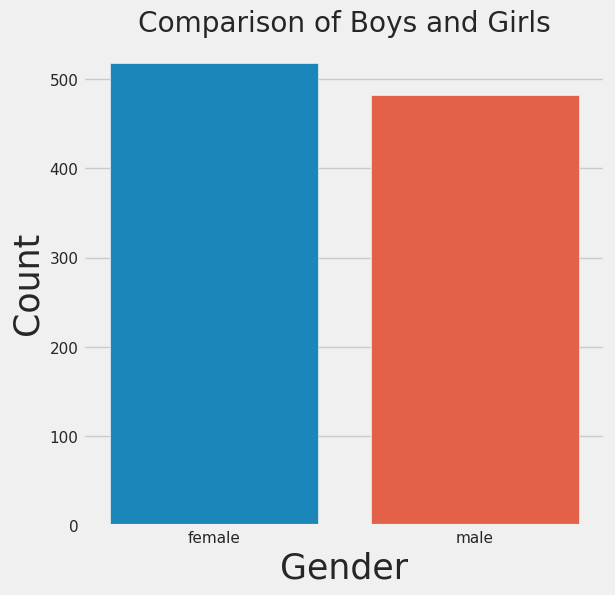

In [ ]:
#visualization no.of boys and girls
plt.rcParams["figure.figsize"]=(6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data=data ,x='gender')
plt.title("Comparison of Boys and Girls",fontweight=27)
plt.xlabel('Gender', fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.show()

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


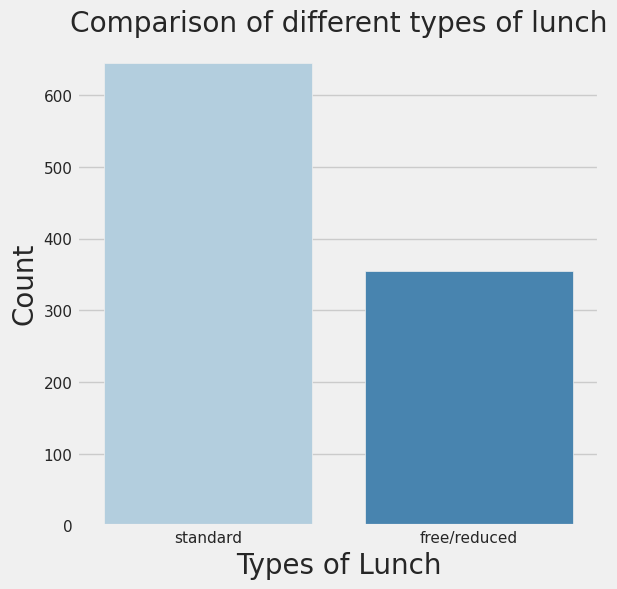

In [ ]:
#visualizing differnt types of lunch
plt.rcParams["figure.figsize"]=(6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data=data ,x="lunch" ,palette='Blues')
plt.title("Comparison of different types of lunch",fontweight=27)
plt.xlabel('Types of Lunch', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

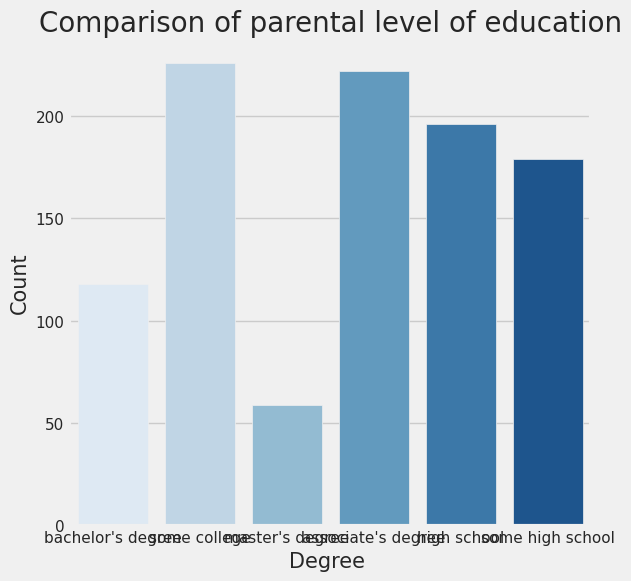

In [ ]:
#visualization of parental level of education
plt.rcParams["figure.figsize"]=(6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data=data ,x="parental level of education" ,palette='Blues')
plt.title("Comparison of parental level of education",fontweight=27, fontsize=20)
plt.xlabel('Degree ', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

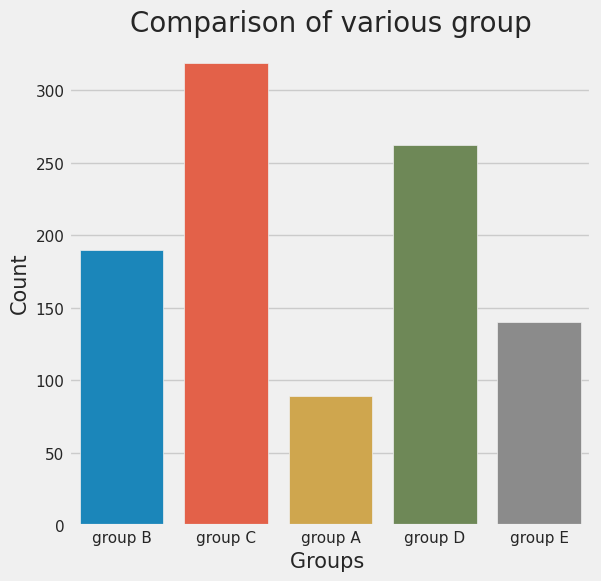

In [ ]:
#visualizing differnt groups in our data set
plt.rcParams["figure.figsize"]=(6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data=data ,x="race/ethnicity" )
plt.title("Comparison of various group",fontweight=27, fontsize=20)
plt.xlabel('Groups ', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

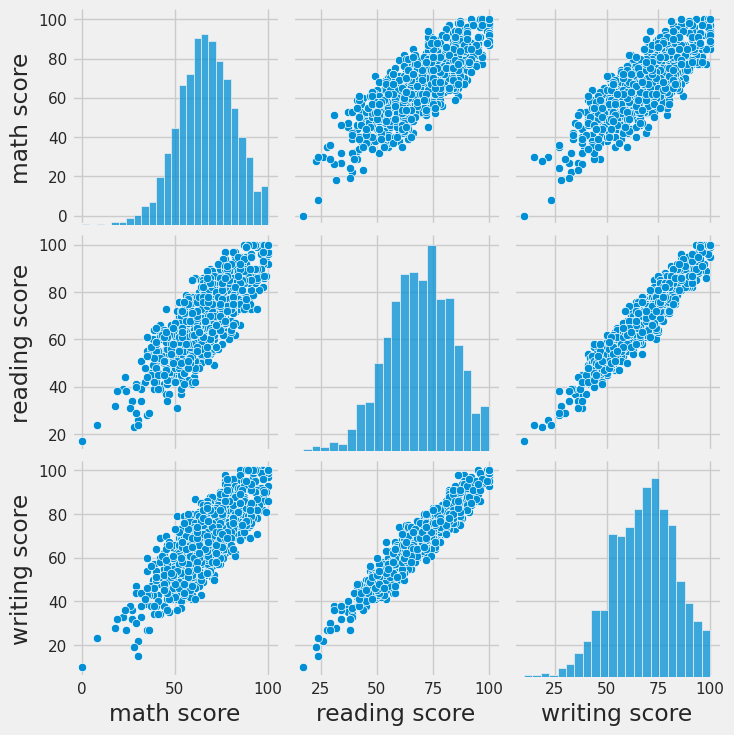

In [ ]:
#visulazing data variables against each other
sb.pairplot(data)

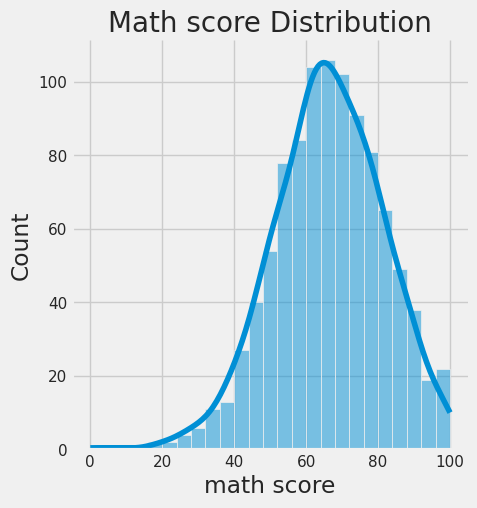

In [ ]:
#data visualization using matplotlib
sb.displot(data['math score'],kde=True)
plt.title("Math score Distribution",fontsize=20)
plt.show()

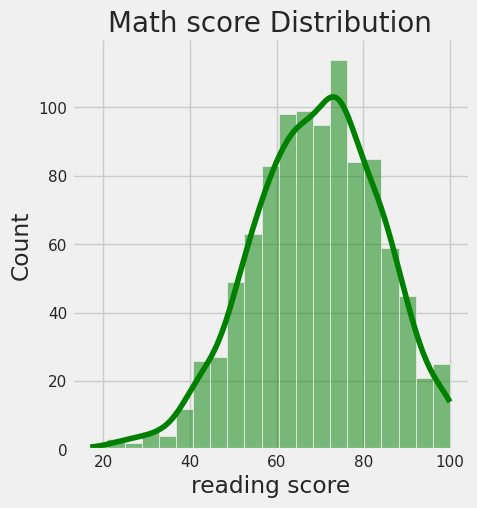

In [ ]:
sb.displot(data['reading score'],kde=True, color='green')
plt.title("Math score Distribution",fontsize=20)
plt.show()

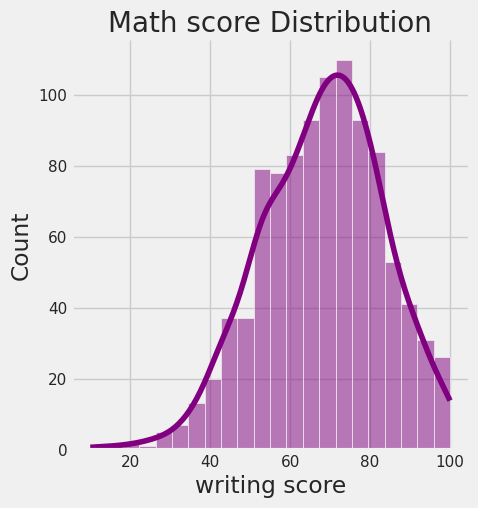

In [ ]:
sb.displot(data['writing score'],kde=True, color='purple')
plt.title("Math score Distribution",fontsize=20)
plt.show()

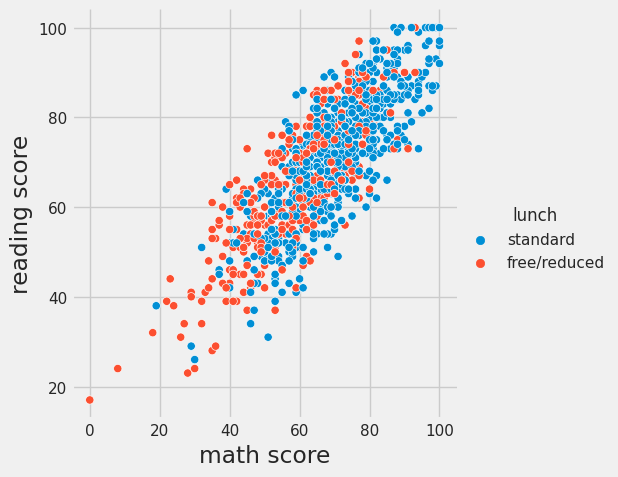

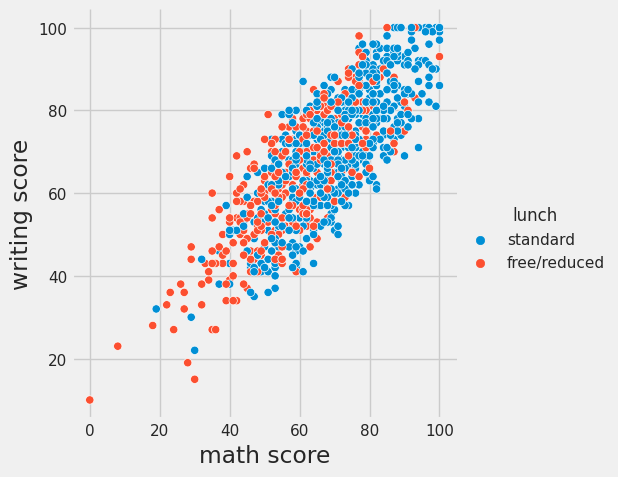

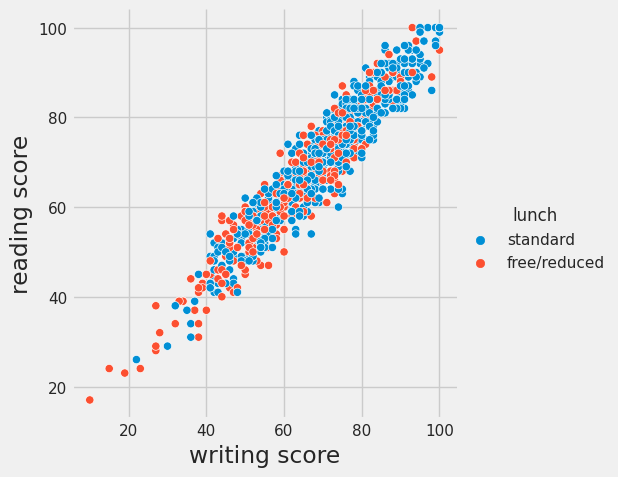

In [ ]:
#analysing the relation between scores of the subject on the basis of lunch
sb.relplot(x="math score", y="reading score",hue="lunch",data=data)
sb.relplot(x="math score", y="writing score",hue="lunch",data=data)
sb.relplot(x="writing score", y="reading score",hue="lunch",data=data)

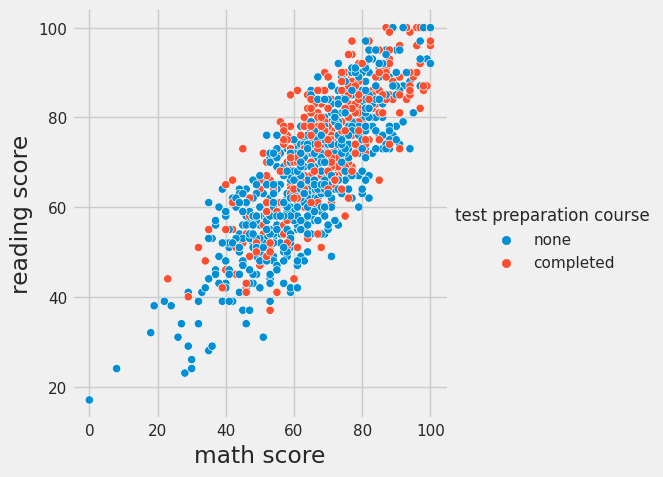

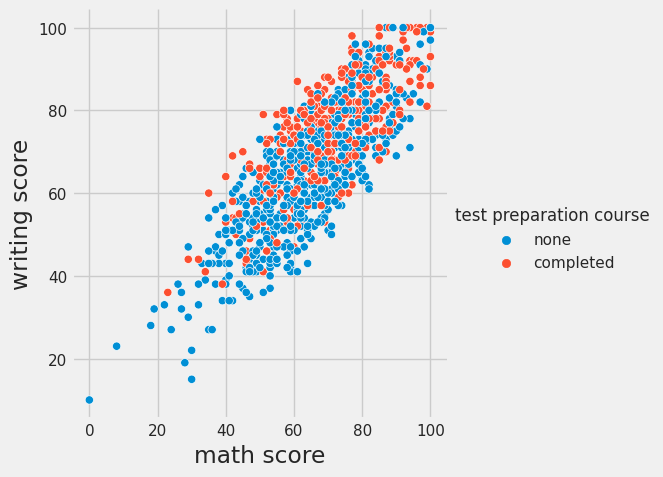

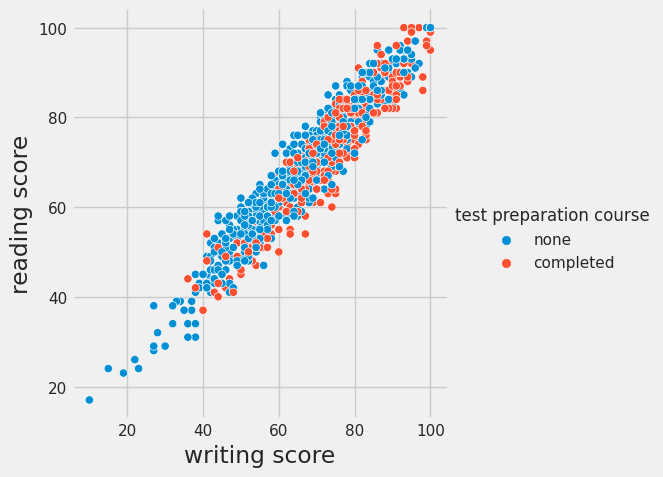

In [ ]:
#analysing the relation between scores of the subject on the basis of test preparation course
sb.relplot(x="math score", y="reading score",hue="test preparation course",data=data)
sb.relplot(x="math score", y="writing score",hue="test preparation course",data=data)
sb.relplot(x="writing score", y="reading score",hue="test preparation course",data=data)

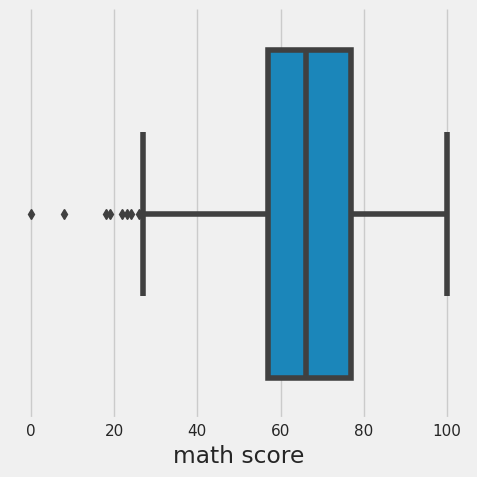

In [ ]:
#cheking outliers
sb.catplot(x='math score',kind='box',data=data)

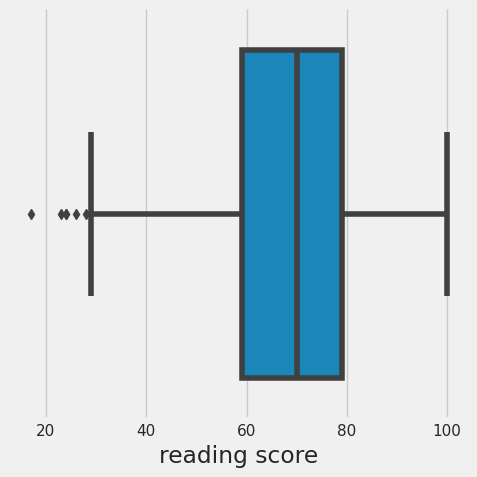

In [ ]:
sb.catplot(x='reading score',kind='box',data=data)

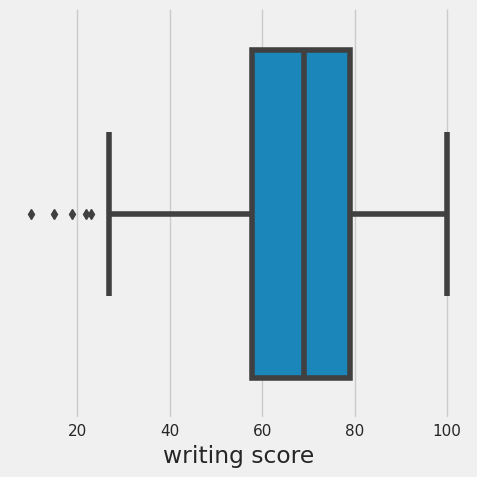

In [ ]:
sb.catplot(x='writing score',kind='box',data=data)

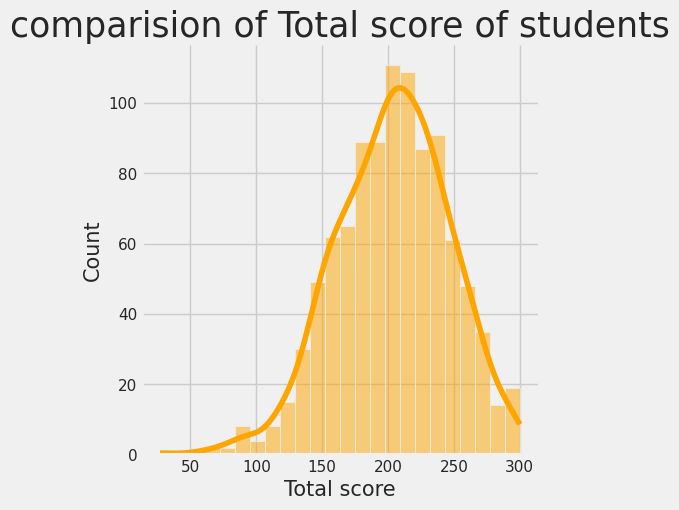

In [ ]:
#plotting the comparison of student passed and failed the examination
data["Total score"]=data['math score']+data['reading score']+data["writing score"]
sb.displot(data["Total score"],kde=True ,color="orange")
plt.title('comparision of Total score of students',fontsize=25)
plt.xlabel('Total score',fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

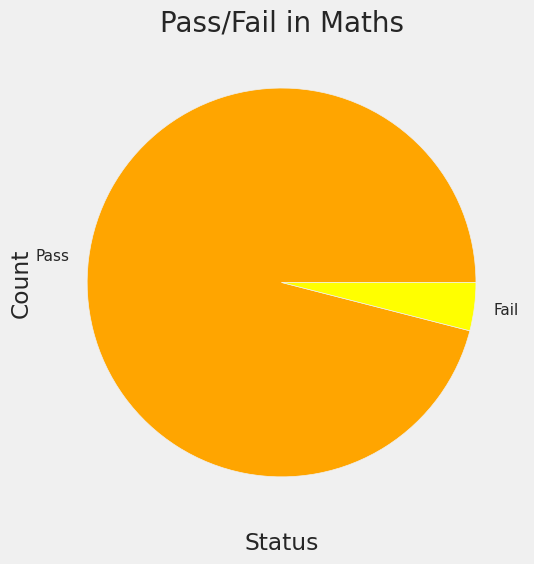

In [ ]:
#feature engineering on the data to visualize and solve the dataset more accurately
#setting a passing mark for the students to pass on the three subjects individually

passmark=40
#creating a new column pass_math, this column will tell us whether thestudents are pass or fail
data['pass math']=np.where(data["math score"]<passmark,"Fail","Pass")
data["pass math"].value_counts().plot.pie(colors=["orange","yellow"])
plt.title("Pass/Fail in Maths" ,fontweight=30,fontsize=20)
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

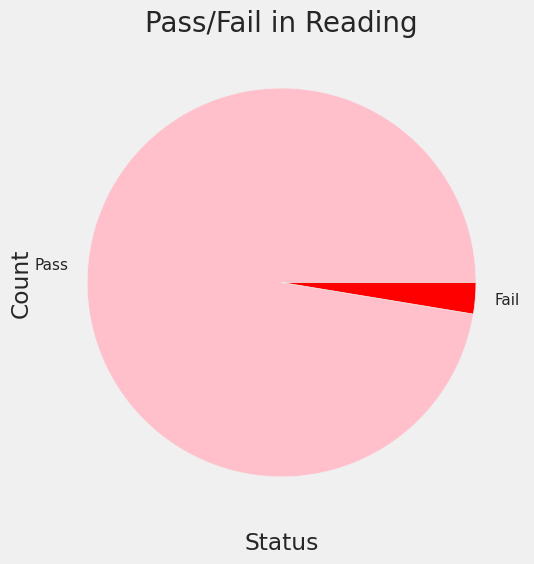

In [ ]:
passmark=40
data['pass reading']=np.where(data["reading score"]<passmark,"Fail","Pass")
data["pass reading"].value_counts().plot.pie(colors=["pink","red"])
plt.title("Pass/Fail in Reading" ,fontweight=30,fontsize=20)
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

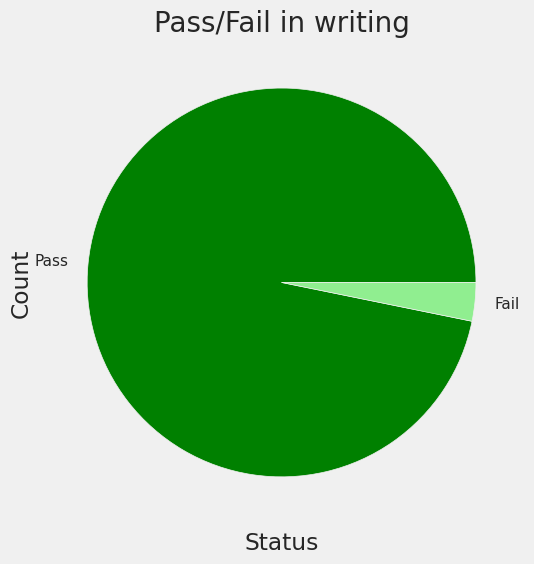

In [ ]:
passmark=40
data['pass writing']=np.where(data["writing score"]<passmark,"Fail","Pass")
data["pass writing"].value_counts(dropna=False).plot.pie(colors=["green","lightgreen"])
plt.title("Pass/Fail in writing" ,fontweight=30,fontsize=20)
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

In [ ]:
data["Total score"]=data['math score']+data['reading score']+data["writing score"]
data['percentage']=data["Total score"]/3

In [ ]:
data['pass_math']=np.where(data['math score']<passmark,"Fail","pass")
data["Status"]=data.apply(lambda x:"Fail" if x["pass_math"]=="Fail" or x["pass reading"]=="Fail" or x["pass writing"] =="Fail" else "Pass", axis=1)


In [ ]:
#Assigning grades to the grades according to the following criteria:
#0 - 40 marsks : grade E
#41 - 60 marsks : grade D
#60 - 700 marsks : grade C
#70 - 80 marsks : grade B
#80 - 90 marsks : grade A
#90 - 100 marsks : grade O

def getgrade(percentage,Status):
  if Status == "Fail":
    return "E"
  if (percentage >=90):
    return '0'
  if (percentage >=80):
    return 'A'
  if (percentage >=70):
    return 'B'
  if (percentage >=60):
    return 'C'
  if (percentage >=40):
    return 'D'
  else :
    return 'E'

data["grades"]=data.apply(lambda x:getgrade(x['percentage'],x['Status']),axis=1)
data["grades"].value_counts()

B    261
C    256
D    234
A    146
0     52
E     51
Name: grades, dtype: int64

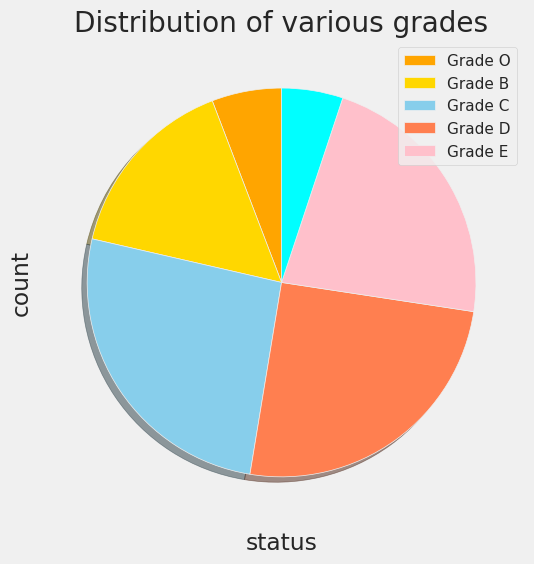

In [ ]:
#plotting a pie chart for the distribution of various grades amongst the students
labels=["Grade O","Grade B","Grade C","Grade D","Grade E"]
sizes=[58,156,260,252,223,51]
colors=['orange','gold','skyblue','coral','pink','cyan']
explode=(0.0001,0.0001,0.0001,0.0001,0.0001,0.0001)

patches, texts=plt.pie(sizes, colors=colors, shadow=True ,startangle=90)
plt.legend(patches,labels)
plt.title("Distribution of various grades")
plt.xlabel("status")
plt.ylabel("count")
plt.show()

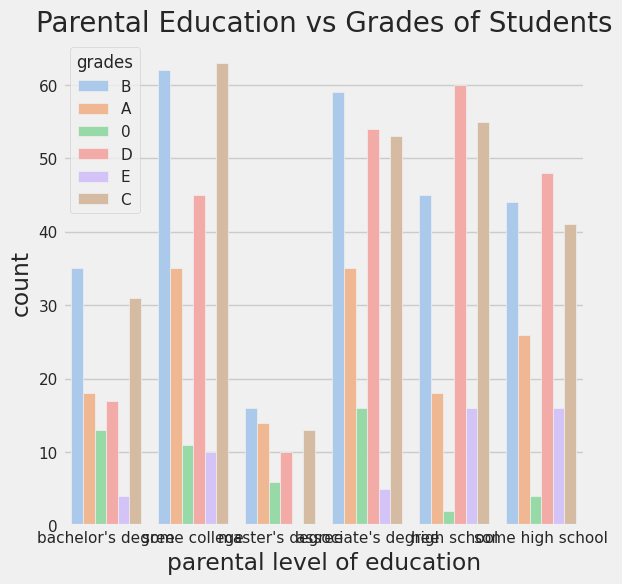

In [ ]:
#for better visualization we will plot it again using seaborn
sb.countplot(x=data['parental level of education'],data=data ,hue=data["grades"],palette='pastel')
plt.title("Parental Education vs Grades of Students",fontsize=20,fontweight=30)
plt.show()

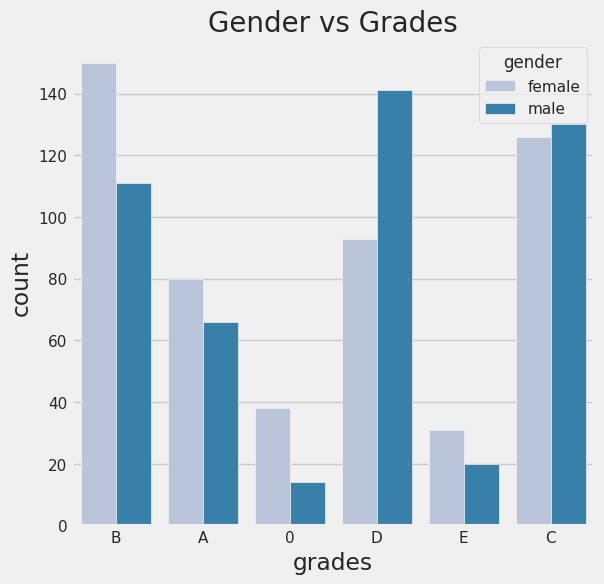

In [ ]:
#comparing the distribution of grades among males and females
sb.countplot(x=data["grades"],data=data,hue=data["gender"],palette="PuBu")
plt.title("Gender vs Grades" , fontweight=30,fontsize=20)
plt.show()

# converting categorical variable to numerical variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
#creating an encoder
le=LabelEncoder()

#label encoding for test preparation course
data["test preparation course"] =le.fit_transform(data["test preparation course"])

#label encoding for lunch
data["lunch"]=le.fit_transform(data["lunch"])

#label encoding for race/ethnicity
#we have to map values to each of the categories
data["race/ethnicity"] = data["race/ethnicity"].replace('group A',1)
data["race/ethnicity"] = data["race/ethnicity"].replace('group B',2)
data["race/ethnicity"] = data["race/ethnicity"].replace('group C',3)
data["race/ethnicity"] = data["race/ethnicity"].replace('group D',4)
data["race/ethnicity"] = data["race/ethnicity"].replace('group E',5)

#label encoding for parental level of education
data["parental level of education"]=le.fit_transform(data["parental level of education"])

#label encoding for gender
data["gender"]=le.fit_transform(data["gender"])

#label encoding for pass math
data["pass_math"]=le.fit_transform(data["pass_math"])

#label encoding for pass reading
data["pass reading"]=le.fit_transform(data["pass reading"])

#label encoding for pass writing
data["pass writing"]=le.fit_transform(data["pass writing"])

#label encoding for pass status
data["Status"]=le.fit_transform(data["Status"])






In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,pass math,pass reading,pass writing,percentage,pass_math,Status,grades
0,0,2,1,1,1,72,72,74,218,Pass,1,1,72.666667,1,1,B
1,0,3,4,1,0,69,90,88,247,Pass,1,1,82.333333,1,1,A
2,0,2,3,1,1,90,95,93,278,Pass,1,1,92.666667,1,1,0
3,1,1,0,0,1,47,57,44,148,Pass,1,1,49.333333,1,1,D
4,1,3,4,1,1,76,78,75,229,Pass,1,1,76.333333,1,1,B
